### 초기설정

In [1]:
%%capture
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [2]:
import pandas as pd

# df_2018 = pd.read_excel('/content/2018.xlsx')
# df_2019 = pd.read_excel('/content/2019.xlsx')
# df_2020 = pd.read_excel('/content/2020.xlsx')
# df_2021 = pd.read_excel('/content/2021.xlsx')
df_2022 = pd.read_excel('/content/2022.xlsx')
df_2023 = pd.read_excel('/content/2023.xlsx')
df_2024 = pd.read_excel('/content/2024.xlsx')

In [3]:
# grade_map = {
#     '① 전혀 그렇지 않다': 1,
#     '② 별로 그렇지 않다': 2,
#     '③ 보통이다': 3,
#     '④ 대체로 그렇다': 4,
#     '⑤ 매우 그렇다': 5
# }

# df_2018['Q16'] = df_2018['Q16'].map(grade_map)

In [4]:
# df_2018['국가명'] = df_2018['COUNTRY']

In [5]:
country_map = {
    1: '일본',
    2: '중국',
    3: '홍콩',
    4: '싱가포르',
    5: '대만',
    6: '태국',
    7: '말레이시아',
    8: '호주',
    9: '미국',
    10: '캐나다',
    11: '영국',
    12: '독일',
    13: '프랑스',
    14: '러시아',
    15: '중동',
    16: '인도',
    17: '필리핀',
    18: '인도네시아',
    19: '베트남',
    20: '몽골',
    97: '기타'
}

# 2018은 이미 COUNTY 컬럼에 국가명이 적혀있음.
# df_2019['국가명'] = df_2019['D_COU1'].map(country_map)
# df_2020['국가명'] = df_2020['D_NAT'].map(country_map)
# df_2021['국가명'] = df_2021['D_NAT'].map(country_map)
df_2022['국가명'] = df_2022['D_NAT'].map(country_map)
df_2023['국가명'] = df_2023['D_NAT'].map(country_map)
df_2024['국가명'] = df_2024['D_NAT'].map(country_map)

- 활동명 매핑 (주요활동/만족활동) - 2022~2024

In [6]:
# 1. 활동명 매핑
q4a_mapping_2022 = {
    "Q4A01": "식도락 관광", "Q4A02": "쇼핑", "Q4A03": "자연경관 감상", "Q4A04": "고궁/역사 유적지 방문",
    "Q4A05": "전통문화체험", "Q4A06": "박물관, 전시관 관람", "Q4A07": "K-POP/한류스타 공연장 방문",
    "Q4A08": "드라마/영화 촬영지 방문", "Q4A09": "연극, 뮤지컬, 발레 등 공연 관람", "Q4A10": "지역 축제 참여",
    "Q4A11": "유흥/오락", "Q4A12": "뷰티/의료관광", "Q4A13": "스포츠/레포츠 및 비즈니스 활동",
    "Q4A14": "업무수행", "Q4A15": "연수/교육/연구", "Q4A16": "시찰(산업시설 등)", "Q4A17": "기타"
}

q4b_code_mapping_2022 = {
    1: "식도락 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험", 6: "박물관, 전시관 관람", 7: "K-POP/한류스타 공연장 방문",
    8: "드라마/영화 촬영지 방문", 9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥/오락", 12: "뷰티/의료관광", 13: "스포츠/레포츠 및 비즈니스 활동",
    14: "업무수행", 15: "연수/교육/연구", 16: "시찰(산업시설 등)", 17: "기타"
}

q4a_cols = list(q4a_mapping_2022.keys())
q4b_cols = ["Q4B1", "Q4B2", "Q4B3"]

# 2. 주요활동 추출 함수
def get_q4a_activities(row):
    return [q4a_mapping_2022[col] for col in q4a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q4b_satisfaction(row):
    return [q4b_code_mapping_2022.get(int(row[col]), f"코드 {row[col]}")
            for col in q4b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2022가 정의된 상태에서만)
df_2022["주요활동"] = df_2022.apply(get_q4a_activities, axis=1)
df_2022["만족활동"] = df_2022.apply(get_q4b_satisfaction, axis=1)


In [7]:
# 1. 활동명 매핑
q8a_mapping_2023 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "고궁/역사 유적지 방문",
    "Q8a05": "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", "Q8a06": "박물관, 전시관 관람",
    "Q8a07": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", "Q8a08": "연극, 뮤지컬, 발레 등 공연 관람",
    "Q8a09": "지역 축제 참여", "Q8a10": "유흥(나이트라이프 활동 및 카지노 등)", "Q8a11": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a12": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a13": "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)",
    "Q8a14": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a15": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a16": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a17": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a18": "연수, 교육, 연구", "Q8a19": "기타"
}

q8b_code_mapping_2023 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "고궁/역사 유적지 방문",
    5: "전통문화체험 (한복체험, 태권도, 한국음식 만들기 등)", 6: "박물관, 전시관 관람",
    7: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문", 8: "연극, 뮤지컬, 발레 등 공연 관람",
    9: "지역 축제 참여", 10: "유흥(나이트라이프 활동 및 카지노 등)",
    11: "오락(놀이공원 및 테마파크 방문 등)", 12: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)",
    13: "치료/건강검진(피부과, 성형외과, 내외과 등 입원, 수술 등)", 14: "스포츠/레포츠 관람 (야구, 축구, 농구 등)",
    15: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)", 16: "국제회의(컨벤션, 국제회의, 전시 등)",
    17: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)", 18: "연수, 교육, 연구", 19: "기타"
}

q8a_cols = list(q8a_mapping_2023.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2023[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2023.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2023이 정의된 상태에서만)
df_2023["주요활동"] = df_2023.apply(get_q8a_activities, axis=1)
df_2023["만족활동"] = df_2023.apply(get_q8b_satisfaction, axis=1)

In [8]:
# 1. 활동명 매핑
q8a_mapping_2024 = {
    "Q8a01": "식도락(음식/미식) 관광", "Q8a02": "쇼핑", "Q8a03": "자연경관 감상", "Q8a04": "휴양/휴식(웰니스)",
    "Q8a05": "고궁/역사 유적지 방문", "Q8a06": "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    "Q8a07": "박물관, 전시관 관람", "Q8a08": "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    "Q8a09": "연극, 뮤지컬, 발레 등 공연 관람", "Q8a10": "지역 축제 참여",
    "Q8a11": "유흥(나이트라이프 활동 및 카지노)", "Q8a12": "오락(놀이공원 및 테마파크 방문 등)",
    "Q8a13": "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", "Q8a14": "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    "Q8a15": "스포츠/레포츠 관람 (야구, 축구, 농구 등)", "Q8a16": "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    "Q8a17": "국제회의(컨벤션, 국제회의, 전시 등)", "Q8a18": "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    "Q8a19": "연수, 교육, 연구", "Q8a20": "기타"
}

q8b_code_mapping_2024 = {
    1: "식도락(음식/미식) 관광", 2: "쇼핑", 3: "자연경관 감상", 4: "휴양/휴식(웰니스)",
    5: "고궁/역사 유적지 방문", 6: "전통문화체험 (한복체험, 태권도, 한국 음식 만들기 등)",
    7: "박물관, 전시관 관람", 8: "K-POP/한류스타 공연장 및 드라마/영화 촬영지 방문",
    9: "연극, 뮤지컬, 발레 등 공연 관람", 10: "지역 축제 참여",
    11: "유흥(나이트라이프 활동 및 카지노)", 12: "오락(놀이공원 및 테마파크 방문 등)",
    13: "뷰티/미용 관광(마사지샵, 헤어샵, 네일케어 등 방문)", 14: "치료/건강검진(피부과, 성형외과, 내외과 입원, 수술 등)",
    15: "스포츠/레포츠 관람 (야구, 축구, 농구 등)", 16: "스포츠/레포츠 참가 (스키, 수영, 골프, 캠핑 등)",
    17: "국제회의(컨벤션, 국제회의, 전시 등)", 18: "비즈니스 전문활동(업무회의, 산업시설 시찰 등)",
    19: "연수, 교육, 연구", 20: "기타"
}

q8a_cols = list(q8a_mapping_2024.keys())
q8b_cols = ["Q8_1a1", "Q8_1a2", "Q8_1a3"]

# 2. 주요활동 추출 함수
def get_q8a_activities(row):
    return [q8a_mapping_2024[col] for col in q8a_cols if col in row and pd.notna(row[col])]

# 3. 만족활동 추출 함수
def get_q8b_satisfaction(row):
    return [q8b_code_mapping_2024.get(int(row[col]), f"코드 {row[col]}")
            for col in q8b_cols if col in row and pd.notna(row[col])]

# 4. 적용 (df_2024이 정의된 상태에서만 실행)
df_2024["주요활동"] = df_2024.apply(get_q8a_activities, axis=1)
df_2024["만족활동"] = df_2024.apply(get_q8b_satisfaction, axis=1)


In [10]:
# 클러스터1 국가 리스트
cluster1_countries = ["미국", "영국", "독일", "프랑스", "캐나다", "호주", "기타"]

# 공통 국가 필터링 함수
def filter_cluster1(df):
    return df[df["국가명"].isin(cluster1_countries)].copy()

# 연도별 필터링
df_cluster1_2022 = filter_cluster1(df_2022)
df_cluster1_2023 = filter_cluster1(df_2023)
df_cluster1_2024 = filter_cluster1(df_2024)

- 계절 컬럼 추가 (계절 분석 시 사용)

In [12]:
import pandas as pd

# 월 → 계절 매핑 함수
def month_to_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:  # 12, 1, 2
        return 'Winter'

# 각 연도별 데이터프레임에 적용
for df in [df_cluster1_2024, df_cluster1_2023, df_cluster1_2022]:
    df['계절'] = df['D_MON'].apply(month_to_season)

# (7/15) 결론 정리

> cluster1 전체를 보았을 때

 "방한 관광의 구조적 계절 흐름"

| 계절             | 공통 패턴                    |
| -------------- | ------------------------ |
| 🌸 봄 (3\~5월)   | 모든 국가에서 증가 시작 (회복기)      |
| ☀️ 여름 (6\~7월)  | 대부분 국가에서 저조 또는 정체 (비성수기) |
| 🍂 가을 (9\~10월) | 가장 강한 공통 피크 시기           |
| ❄️ 겨울 (11\~2월) | 국가별 차이 크지만 대체로 하향 또는 유지  |

> 계절별로 군집을 나누어서 아래와 같은 결과 도출


| 군집      | 구성 국가               | 기준                           |
| ------- | ------------------- | ---------------------------- |
| **A군집** | 🇺🇸 🇨🇦 🇦🇺 🇫🇷 | 계절 흐름 유사 (봄/가을 피크, 여름 저점 반복) |
| **B군집** | 🇩🇪 🇬🇧           | 12월~2월 겨울 제외 비슷 / 굳이 나누자면 7~10월 중심 피크형 계절 구조 + 여름~가을 복합 피크형     |
| **C군집** | 기타국가                | 계절 흐름이 해마다 불일치 (패턴 불안정)      |


➔ 군집별로 계절별 활동의 차이를 보고 싶었으나 유의미한 차이가 없다고 판단되었다.

  (구성비가 0.2 이하로 차이나기 때문)



# (7/15) 회의에서의 아이디어 정리

**장거리 고소비층 타깃 전략 아이디어**

- **개별여행 수요 확대**
  - 자유로운 일정·맞춤형 콘텐츠 선호  
  - 지역 축제·로컬 콘텐츠 접근성 **부족** → 정보 기반 강화 필요
- **치안 중시**
  - 재방문 의향자일수록 안전·신뢰성 요소를 중요하게 평가  
  - 가족·비즈니스 일정과 연계된 **안정적 여행 테마** 수요와 맞닿음
- **계절·지역 만족도 시너지**
  - 계절별 선호 활동 + 지역 만족도 데이터 결합 → **정교한 콘텐츠 설계** 가능


# 계절별 분석에서 정말 A, B, C 군집으로 나눈게 의미 있는지 통계 검정으로 확인

In [13]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# 1) 한글 국가명 → A/B/C 군집 매핑
mapping = {
    '미국': 'A', '캐나다': 'A', '호주': 'A', '프랑스': 'A',
    '독일': 'B', '영국': 'B'
    # 나머지는 자동으로 C 처리
}

# 2) 연도별 DF에 군집 컬럼 추가 및 하나로 합치기
for df in [df_cluster1_2022, df_cluster1_2023, df_cluster1_2024]:
    df['cluster_group'] = df['국가명'].map(mapping).fillna('C')

all_df = pd.concat(
    [df_cluster1_2022, df_cluster1_2023, df_cluster1_2024],
    ignore_index=True
)

# 3) pivot table: 군집 × 계절 (가중치 합)
ct = pd.pivot_table(
    all_df,
    index='cluster_group',
    columns='계절',        # 이미 생성된 컬럼명
    values='weight',      # 가중치 컬럼명
    aggfunc='sum',
    fill_value=0
)

# 4) 카이제곱 검정 및 Cramér’s V 계산
chi2, p, dof, expected = chi2_contingency(ct)
cramers_v = np.sqrt(chi2 / (all_df['weight'].sum() * (min(ct.shape)-1)))

print("교차표:\n", ct)
print(f"Chi² = {chi2:.2f}")
print(f"p-value = {p:.4f}")
print(f"Cramér’s V = {cramers_v:.3f}")

교차표:
 계절                    Autumn         Spring         Summer         Winter
cluster_group                                                            
A              610934.081758  558920.699955  358600.954141  450300.925025
B              176764.642315  159321.562846  179240.750144  110632.977164
C              427864.777214  389172.516081  399783.438226  262501.960161
Chi² = 55999.40
p-value = 0.0000
Cramér’s V = 0.083


## 통계 검정 결과 요약

- **p-value = 0.0000 (< 0.05)**  
  - 표본 크기가 커서 통계적으로 유의미한 차이가 검출되었으나,  
    N이 크면 아주 작은 차이에도 유의하게 나타날 수 있습니다.

- **Cramér’s V = 0.083 (< 0.1)**  
  - 0~1 사이 값 중 0.1 미만은 ‘효과 크기(small)’로 분류됩니다.  
  - 즉, 군집 간 계절 분포 차이는 **실질적 차이가 거의 없다**고 볼 수 있습니다.

---

### 결론

클러스터(A/B/C)별로 계절별 방문 패턴의 통계적 차이는 있으나,  
효과 크기가 작아 “현저히 다른 패턴”이라고 보기 어렵습니다.  
따라서 계절별 전략 세분화보다는  
**클러스터의 공통 특성** (장거리·고소비, 활동 유형, 재방문 동기 등)에 집중하는 편이 효율적.

❓하지만 영국 , 독일은 다른 나라대비 확실하게 여름이 강세 (3-10월까지 비슷)

## 2023-2024년 추세

cluster1에서 '기타'국가 제외
(2022년 가중치 컬럼 없음)

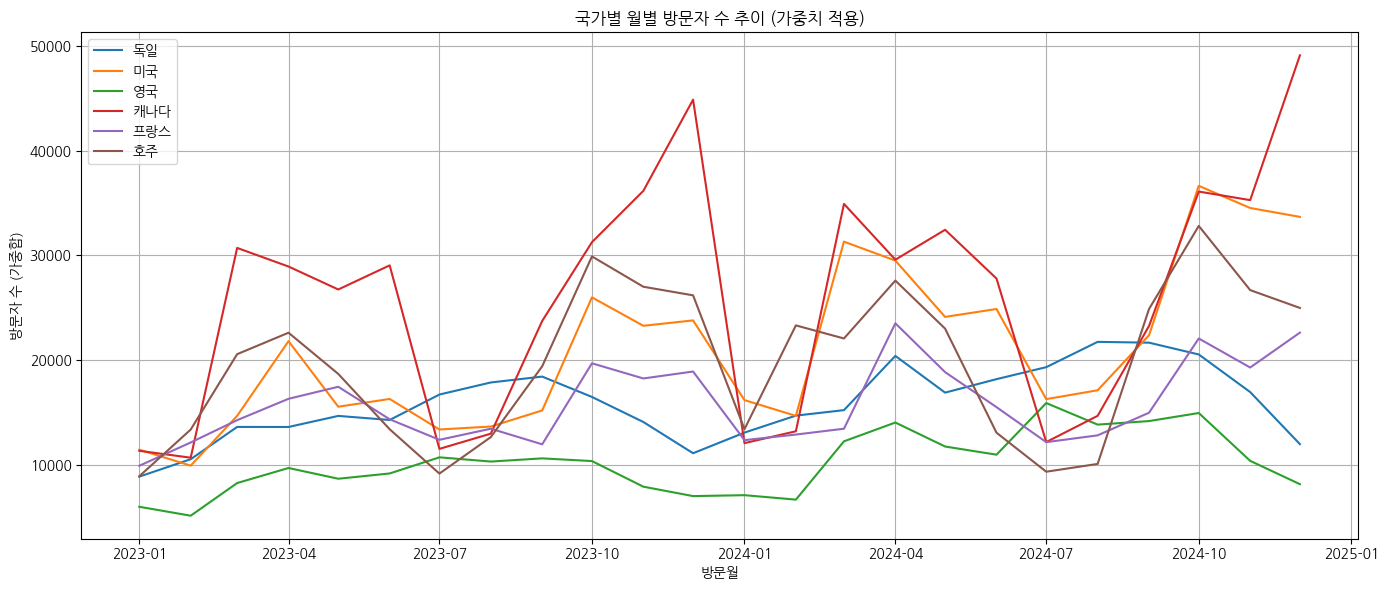

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 지정 (koreanize_matplotlib 없이도 동작 보장)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. date 컬럼 생성: 연도 정보를 직접 추가
df_cluster1_2023['date'] = pd.to_datetime('2023-' + df_cluster1_2023['D_MON'].astype(str).str.zfill(2))
df_cluster1_2024['date'] = pd.to_datetime('2024-' + df_cluster1_2024['D_MON'].astype(str).str.zfill(2))

# 2. 병합
df_merged = pd.concat([df_cluster1_2023, df_cluster1_2024], ignore_index=True)
df_merged = df_merged[df_merged['국가명'] != '기타']

# 3. 국가별-월별 가중 방문자 수 집계
grouped = df_merged.groupby(['date', '국가명'])['weight'].sum().reset_index()

# 4. 피벗 테이블로 변환
pivot_df = grouped.pivot(index='date', columns='국가명', values='weight').fillna(0)

# 5. 시계열 그래프
plt.figure(figsize=(14, 6))
for country in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.title("국가별 월별 방문자 수 추이 (가중치 적용)")
plt.xlabel("방문월")
plt.ylabel("방문자 수 (가중합)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- 그렇지만 시계열 그래프만 봐도 B 군집(영국/ 독일)의 피크는 여름부터.

# 결론(A, B군집타겟 교차로 계절별 아이디어)

 계절 전부를 고려할 수 있음

- **4월(봄) & 7-8월(한여름) & 9-10월(초가을) & 11~-2월(연말)**  
  - **4월**: “스프링 톱업” (A+B 모두)  
  - **7~8월**: “서머 포커스” (B주도)  
  - **9~10월**: “가을 메인” (A주도 + B 유지)  
  - **11~12월**: “연말/홀리데이” (A주도)


분석을 하면서 무조건적으로 A, B를 넣기보단 해석 리포트에 군집 A/B 언급

전체 흐름:

4월(봄) → 7–8월(한여름) → 9–10월(초가을) → 11–12월(연말) 순으로 방문 가중치가 높아졌다가 완만히 하락

A/B 군집 차이(해석에서 언급):

- A군집(미·캐·호·프)은 4월·9–10월 봄·가을 피크가 두드러지고,

- B군집(독·영)은 7–8월 초여름 피크가 상대적으로 강했다는 점을 참고

실무 제언:

  전체 캠페인은 위 4개 기간에 맞춰 짜되,

  봄·가을 메시지는 A군집 국가에,

  여름 메시지는 B군집 국가에 좀 더 무게를 실어 배분